In [31]:
%matplotlib notebook
import numpy as np
import matplotlib
#from matplotlib.patches import Circle, Wedge, Polygon
#from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
from shapely.geometry.polygon import LinearRing, Polygon, LineString
import math

In [2]:
"""
18.902398492981707 -105.64909 18.93213570380475 -105.64229 19.08040905127696 -105.60826 19.22868766398696 -105.5742 19.37697722991676 -105.5401 19.525285562661907 -105.50597 19.673685344280216 -105.47179 19.822152838910228 -105.43756 19.895157535211737 -105.4207 19.896402706170434 -104.90675 18.904109574054498 -104.90732 18.902398492981707 -105.64909
"""
pts = [(18.902398492981707, -105.64909), 
       (18.93213570380475, -105.64229), 
       (19.08040905127696, -105.60826),
       (19.22868766398696, -105.5742),
       (19.37697722991676, -105.5401),
       (19.525285562661907, -105.50597),
       (19.673685344280216, -105.47179),
       (19.822152838910228, -105.43756),
       (19.895157535211737, -105.4207),
       (19.896402706170434, -104.90675),
       (18.904109574054498, -104.90732), 
       (18.902398492981707, -105.64909)]
print(len(pts))
np_pts = np.asarray(pts, dtype=np.float32)
np_pts

12


array([[  18.9024  , -105.64909 ],
       [  18.932137, -105.64229 ],
       [  19.08041 , -105.60826 ],
       [  19.228687, -105.5742  ],
       [  19.376978, -105.5401  ],
       [  19.525286, -105.50597 ],
       [  19.673685, -105.47179 ],
       [  19.822153, -105.43756 ],
       [  19.895157, -105.4207  ],
       [  19.896402, -104.90675 ],
       [  18.90411 , -104.90732 ],
       [  18.9024  , -105.64909 ]], dtype=float32)

<IPython.core.display.Javascript object>


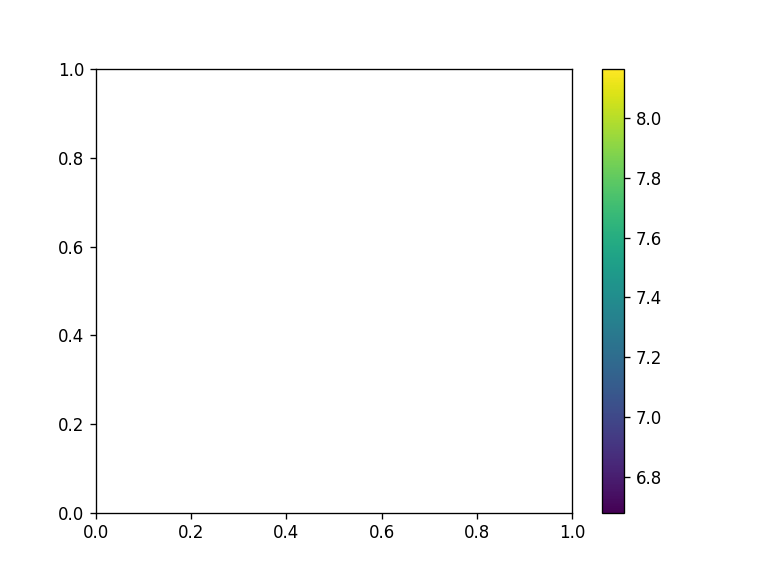

In [3]:
fig, ax = plt.subplots()
poly = matplotlib.patches.Polygon(np_pts, True)
p = matplotlib.collections.PatchCollection([poly])
colors = 100*np.random.rand(1)
p.set_array(np.array(colors))
ax.add_collection(p)
fig.colorbar(p, ax=ax)
plt.show()

<IPython.core.display.Javascript object>


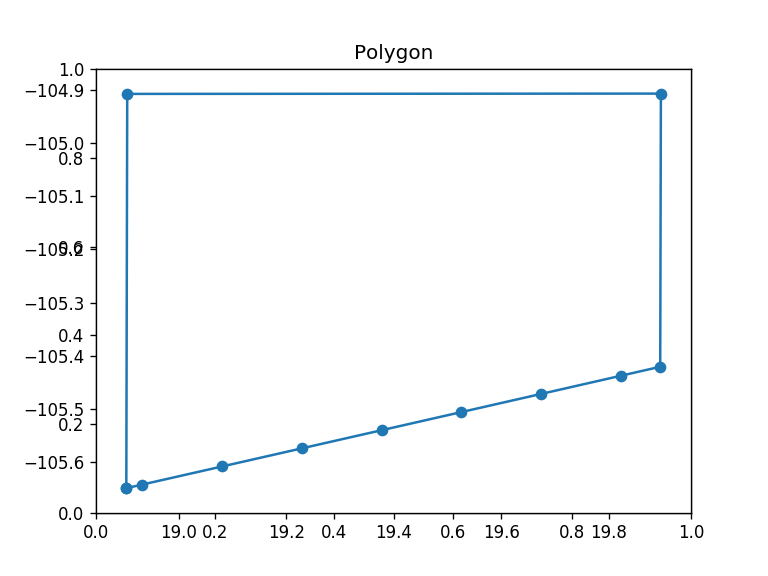

In [14]:
x =None
y = None
poly = Polygon(pts)
x,y = poly.exterior.xy
#ring = LinearRing(pts)
#x,y = ring.xy

fig, ax = plt.subplots()
ax = fig.add_subplot(111)
ax.scatter(x,y)
ax.plot(x, y)# , color='#6699cc', alpha=0.7, linewidth=1, solid_capstyle='round', zorder=2)
ax.set_title('Polygon')
plt.show()


In [4]:
import os
from xmljson import badgerfish as bf
from json import dumps, loads
from xmljson import Yahoo
from collections import OrderedDict
from xml.etree.ElementTree import fromstring
import re

In [5]:
def printKeys(d): 
    c = 0
    for e in d: print(f'{c} - {e}'); c += 1;

def isFinalStringMatched(s, m):
    return re.match('.+' + m, s)

In [6]:
# Read file
fd = './s2img/S2A_MSIL1C_20190513T171901_N0207_R012_T13QDB_20190513T222229.SAFE'

def getPoly(fd):
    path_manifest = os.path.join(fd, 'manifest.safe')
    if not os.path.exists(path_manifest): print('error, no manifest file');  return;
    xml_string = ''
    with open(path_manifest, 'r') as myfile: xml_string = myfile.read().replace('\n', '')
    bf = Yahoo(dict_type=OrderedDict, xml_fromstring=True)
    json = loads(dumps(bf.data(fromstring(xml_string))))
    #printKeys(json)
    
    # Get first element (it's supposed to just have one element)
    cnt = 0
    for e in json: 
        if cnt == 0: json = json[e]; cnt +=1;
        else: print('error, too much args for the json?'); return;
    #printKeys(json)
    metadata = json['metadataSection']['metadataObject']
    #printKeys(metadata)
    metacombo = None
    fs = None
    foot_print = None
    coordinates = None
    try:
        for info in metadata:
            if info['ID'] == 'measurementFrameSet': metacombo = info['metadataWrap']['xmlData']
        for k in metacombo:
            if isFinalStringMatched(k, 'frameSet'): fs = metacombo[k]
        for k in fs:
            if isFinalStringMatched(k, 'footPrint'): foot_print = fs[k]
        for k in foot_print:
            if isFinalStringMatched(k, 'coordinates'): coordinates = foot_print[k]
    except:
        print('Error on searching measurement, frameset, footprint')
    
    coo = []
    try:
        sp = coordinates.split(' ')
        for i in range(0, len(sp), 2):
            coo.append((float(sp[i]), float(sp[i+1])))
    except:
        print('Error on editing coordinates')
    
    return coo

coo = getPoly(fd)
coo

[(18.902398492981707, -105.64909),
 (18.93213570380475, -105.64229),
 (19.08040905127696, -105.60826),
 (19.22868766398696, -105.5742),
 (19.37697722991676, -105.5401),
 (19.525285562661907, -105.50597),
 (19.673685344280216, -105.47179),
 (19.822152838910228, -105.43756),
 (19.895157535211737, -105.4207),
 (19.896402706170434, -104.90675),
 (18.904109574054498, -104.90732),
 (18.902398492981707, -105.64909)]

In [7]:
def printPoly(c):
    x =None
    y = None
    poly = Polygon(c)
    x,y = poly.exterior.xy

    fig, ax = plt.subplots()
    ax = fig.add_subplot(111)
    ax.scatter(x,y)
    ax.plot(x, y)# , color='#6699cc', alpha=0.7, linewidth=1, solid_capstyle='round', zorder=2)
    ax.set_title('Polygon')
    plt.show()

[(18.902370898980607, -105.66106), (18.92717093612648, -105.65538), (19.075525148699484, -105.62137), (19.22390079823695, -105.587326), (19.372320553565142, -105.55325), (19.520774706243607, -105.519165), (19.669240195947765, -105.485016), (19.81769544990544, -105.450836), (19.89512784979583, -105.43295), (19.896402706170434, -104.90675), (18.904109574054498, -104.90732), (18.902370898980607, -105.66106)]


<IPython.core.display.Javascript object>


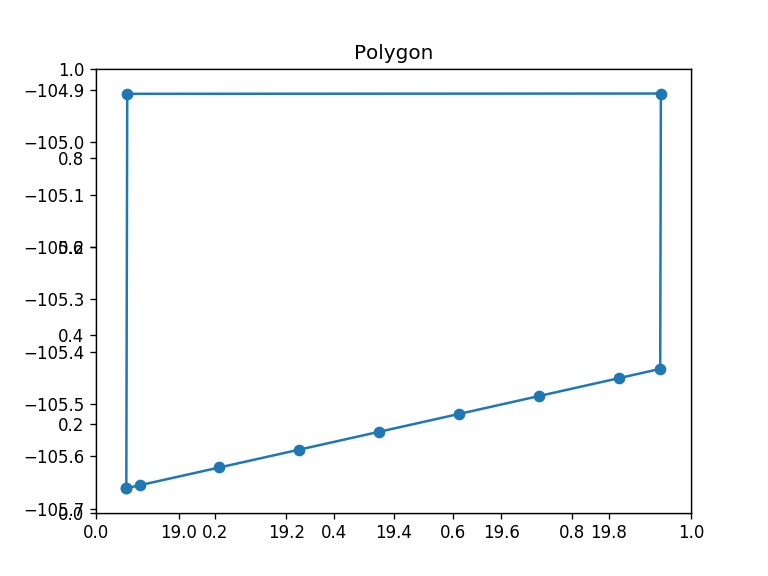

In [8]:
fd = './s2img/S2B_MSIL2A_20190508T171909_N0212_R012_T13QDB_20190530T201058.SAFE/'
coo = getPoly(fd)
print(coo)
printPoly(coo)

In [15]:
def getLeftAndRightOfTuples(t):
    l = []
    r = []
    for (x, y) in t: l.append(x); r.append(y);
    return l, r

In [16]:
def transformToNegatives(c, to_x = True, to_y = True):
    new_c = []
    for x, y in c:
        new_x = -x if to_x else x
        new_y = -y if to_y else y
        new_c.append((new_x, new_y))
    return new_c

In [10]:
def getMaximumPairsOfTuples(c, x, y):
    maxx = max(x); minx = min(x); maxy = max(y); miny = min(y);
    ex = []
    for x, y in c:
        if (x == minx or x == maxx) and (x, y) not in ex: ex.append((x, y)); continue;
        if (y == miny or y == maxy) and (x, y) not in ex: ex.append((x, y)); continue;
    return ex

In [11]:
def distance(p1, p2):
    return math.hypot(p1[0]-p2[0], p1[1]-p2[1])

def getArea(a, b, c):
    side_a = distance(a, b)
    side_b = distance(b, c)
    side_c = distance(c, a)
    s = 0.5 * ( side_a + side_b + side_c)
    return math.sqrt(s * (s - side_a) * (s - side_b) * (s - side_c))

In [12]:
def getBiggerTriangleArea(p1, p2, l, available_points):
    x3 = 0; y3 = 0; a = 0
    for x, y in l:
        if (x, y) == p1 or (x, y) == p2 or (x, y) in available_points: continue
        area = getArea(p1, p2, (x, y))
        if area > a: 
            a = area; x3 = x; y3 = y;
    return x3, y3

[(18.904109574054498, -104.90732), (18.902370898980607, -105.66106), (19.89512784979583, -105.43295), (19.896402706170434, -104.90675)]


<IPython.core.display.Javascript object>


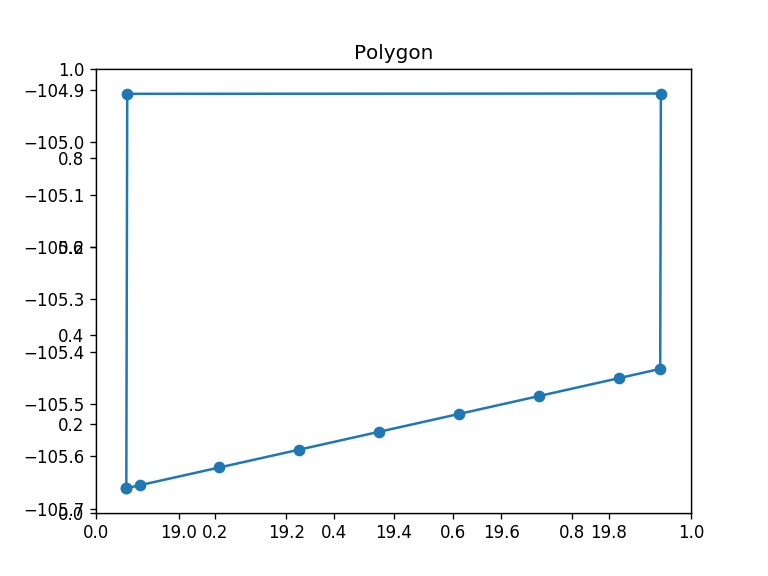

<IPython.core.display.Javascript object>


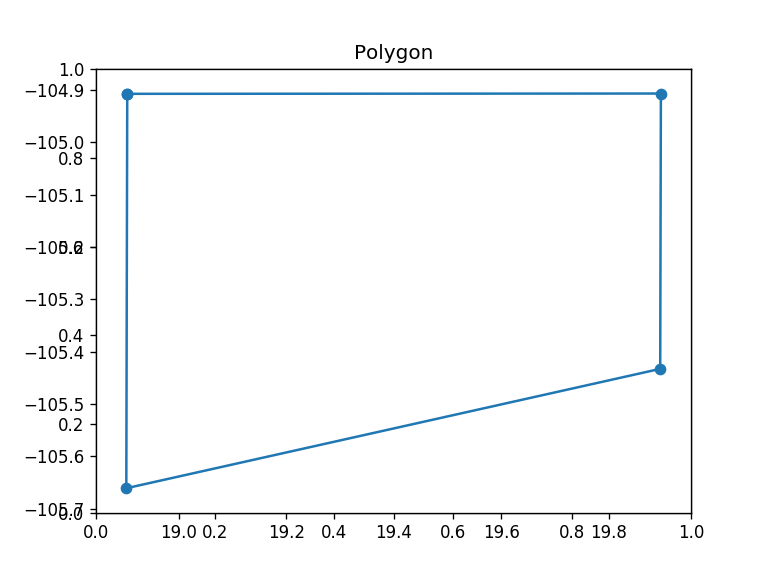

In [17]:
def getExtremes(c):
    if len(c) == 4: return c
    xl, yl = getLeftAndRightOfTuples(c)
    ex = getMaximumPairsOfTuples(c, xl, yl) 

    # find missing points if any
    for i in range(len(ex), 4):
        x, y = getBiggerTriangleArea(ex[0], ex[1], c, ex)
        ex.append((x, y))

    # order the points as they come in the polygon
    new_ex = []
    for x, y in c:
        if (x, y) in ex and (x, y) not in new_ex: new_ex.append((x, y))
    ex = new_ex[:]
    # order the points so that the upper left point is the first in the list
    xl, yl = getLeftAndRightOfTuples(ex)
    xlo = sorted(xl) # smallest to biggest
    ylo = sorted(yl)
    st = None
    for x, y in ex:
        if x in [xlo[0], xlo[1], xlo[2]] and y in [ylo[3], ylo[2]]: st = (x, y)
    new_ex = []
    b = False; j = 0
    while (len(new_ex) < 4):
        n = j if j < 4 else j - 4
        if ex[n] == st: b = True
        if b: new_ex.append(ex[n])
        j += 1

    return new_ex
    
ex = getExtremes(coo)
print(ex)
printPoly(coo)
printPoly(ex)

In [14]:
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1])

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
        raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    return x, y

#print line_intersection((A, B), (C, D))

In [34]:
def getLineIntersection(l1, l2):
    line1 = LineString([l1[0], l1[1]])
    line2 = LineString([l2[0], l2[1]])
    return line1.intersection(line2)

In [39]:
# assuming p1 is starting point and p2 ending point, so d
def getPointFromPercentageDistance(p1, p2, per):
    x1, y1 = p1; x2, y2 = p2
    x3 = x1 + per * (x2 - x1)
    y3 = y1 + per * (y2 - y1)
    return x3, y3

[(18.904109574054498, -104.90732), (18.902370898980607, -105.66106), (19.89512784979583, -105.43295), (19.896402706170434, -104.90675)]
(19.044432236991526, -105.52543938775487)


<IPython.core.display.Javascript object>


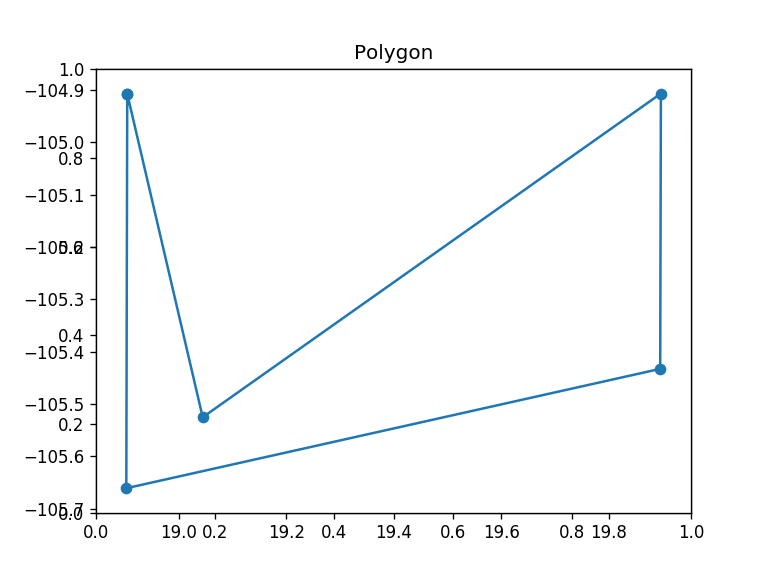

In [46]:
# Assume (0, 0) is the left upper point
def findPos(poly, xpix, ypix, xlen, ylen):
    # position with respect to the main picture
    upper_left = poly[0]
    upper_right = poly[3]
    bottom_right = poly[2]
    bottom_left = poly[1]
    perx = xpix / xlen
    pery = ypix / ylen
    A = getPointFromPercentageDistance(upper_left, bottom_left, pery)
    B = getPointFromPercentageDistance(upper_left, upper_right, perx)
    C = getPointFromPercentageDistance(upper_right, bottom_right, pery)
    D = getPointFromPercentageDistance(bottom_left, bottom_right, perx)
    return line_intersection((A, C), (B, D))


print(ex)
pos = findPos(ex, 100, 600, 700, 700)
print(pos)
printPoly(ex + [pos])

In [47]:
def getCoordinatesOfpixel(img_file, xpix, ypix, xlen, ylen):
    poly = getPoly(img_file)
    coo = getExtremes(poly)
    return findPos(coo, xpix, ypix, xlen, ylen)

getCoordinatesOfpixel(fd, 100, 600, 700, 700)

(19.044432236991526, -105.52543938775487)